In [6]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys 
import time
import pandas as pd
import random
import re

#기간(2023.01.01 ~)부터인것만 수집
browser = webdriver.Chrome()
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

results = []
for i in range(10):
    # 화면 빈 곳을 선택
    body = browser.find_elements('css selector', 'body')[0]
    # Page Down 버튼을 입력..
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.uniform(2, 4))

    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    video_list = soup.select('ytd-rich-grid-media.style-scope.ytd-rich-item-renderer')

    for video in video_list:
        title = video.select('#video-title')[0].text

        view = video.select('div#metadata-line > span')[0].text
        numbers = re.findall(r'\d+', view)
        view_number = int(numbers[0])

        original_date = video.select('div#metadata-line > span')[1].text
        date = original_date
        # '일 전', '개월 전', '년 전'에 따라 다르게 처리
        if '시간 전' in date:
            date = 1 
        elif '일 전' in date:
            date = int(date.replace('일 전', ''))
        elif '주 전' in date:
            date = int(date.replace('주 전', '')) * 3
        elif '개월 전' in date:
            date = int(date.replace('개월 전', '')) * 30
        elif '년 전' in date:
            date = int(date.replace('년 전', '')) * 365
        else:
            try:
                date = int(date)
            except ValueError:
                print(f"{date}를 숫자로 변환할 수 없습니다.")
                continue
                
         # 날짜가 330 이하인 경우만 수집
        if date <= 330 and '갤럭시' in title: 
    #          print(title, '|', original_date, '|', view_number,'|',full_link)
            data = [title, original_date, view]
            results.append(data)

df = pd.DataFrame(results)
df.columns = ['title','original_date','view']
df

,title,original_date,view
0,"[갤럭시 Z 플립5 | Z 폴드5] 금요일, 마감 시간 편 | 삼성전자",2일 전,조회수 1.1천회
1,"[갤럭시 Z 플립5 | Z 폴드5] 목요일, 사진 촬영 편 | 삼성전자",3일 전,조회수 824회
2,[갤럭시 | 메종 마르지엘라] 갤럭시 Z 플립5 메종 마르지엘라 에디션 | 삼성전자,3일 전,조회수 2.4천회
3,"[갤럭시 Z 플립5 | Z 폴드5] 수요일, 점심의 일상 탈출 편 | 삼성전자",4일 전,조회수 892회
4,"[갤럭시 Z 플립5 | Z 폴드5] 화요일, VIP 고객님 편 | 삼성전자",5일 전,조회수 1.2천회
...,...,...,...
472,[갤럭시 S23] ㅇㅇㅇ 삼성페이편 | 삼성전자,9개월 전,조회수 384만회
473,[갤럭시 S23] ㅇㅇㅇ 2억 화소편 | 삼성전자,9개월 전,조회수 304만회
474,[갤럭시 S23] ㅇㅇㅇ 나이토그래피편 | 삼성전자,9개월 전,조회수 311만회
475,[갤럭시 S23] ㅇㅇㅇ 줌편 | 삼성전자,9개월 전,조회수 308만회


C:\Users\82109\AppData\Local\Temp\ipykernel_21644\1391021106.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['upload_date'] = pd.to_datetime(df['original_date'], errors='coerce')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) mis

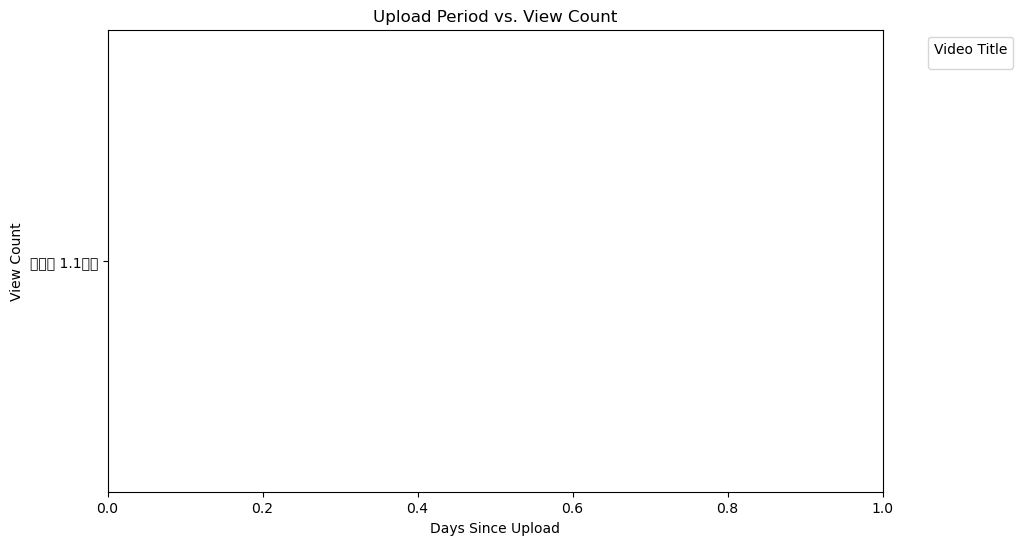

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'original_date'에서 날짜 정보 추출 및 계산
df['upload_date'] = pd.to_datetime(df['original_date'], errors='coerce')
df['days_since_upload'] = (pd.to_datetime('today') - df['upload_date']).dt.days

# 그래프 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_upload', y='view', data=df, hue='title', palette='viridis', s=100)
plt.title('Upload Period vs. View Count')
plt.xlabel('Days Since Upload')
plt.ylabel('View Count')
plt.legend(title='Video Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys 
import time
import pandas as pd
import random
import re

#기간(2023.01.01 ~)부터인것만 수집
browser = webdriver.Chrome()
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

for i in range(10):
    # 화면 빈 곳을 선택
    body = browser.find_elements('css selector', 'body')[0]
    # Page Down 버튼을 입력..
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.uniform(2, 4))

html = browser.page_source 
soup = BeautifulSoup(html, 'html.parser')
video_list = soup.select('ytd-rich-grid-media.style-scope.ytd-rich-item-renderer')
filtered_video_list = []
results=[]

for video in video_list:
    title = video.select('#video-title')[0].text
    
    view = video.select('div#metadata-line > span')[0].text
    numbers = re.findall(r'\d+', view)
    view_number = int(numbers[0])
    
    original_date = video.select('div#metadata-line > span')[1].text
    date = original_date
    # '일 전', '개월 전', '년 전'에 따라 다르게 처리
    if '시간 전' in date:
        date = 1 
    elif '일 전' in date:
        date = int(date.replace('일 전', ''))
    elif '주 전' in date:
        date = int(date.replace('주 전', '')) * 3
    elif '개월 전' in date:
        date = int(date.replace('개월 전', '')) * 30
    elif '년 전' in date:
        date = int(date.replace('년 전', '')) * 365
    else:
        try:
            date = int(date)
        except ValueError:
            print(f"{date}를 숫자로 변환할 수 없습니다.")
            continue
    
    link = video.select('#video-title-link')[0]['href']
    full_link = 'https://www.youtube.com' + link
    
     # 날짜가 330 이하인 경우만 수집
    if date <= 330 and '갤럭시' in title: 
#          print(title, '|', original_date, '|', view_number,'|',full_link)
        data = [title, original_date, view, full_link]
        results.append(data)

df = pd.DataFrame(results)
df.columns = ['title','original_date','view','full_link']

df_sorted = df.sort_values(by='view', ascending=True)
print(df_sorted)

video_links = df_sorted['full_link'].head(5).tolist()
#print(video_links)

for link in video_links:
    browser.get(link)
    time.sleep(3)
    
    for i in range(3):
        body = browser.find_elements('css selector', 'body')[0]
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)
    
    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    replies = soup.select('ytd-comment-thread-renderer')
    
    for reply in replies:
        reply_content = reply.select('#content > yt-formatted-string')[0].text
        print(reply_content)
        print('-'*60)
        
    next_link = df.loc[df['full_link'] == link, 'full_link'].shift(-1).values[0]

ㅋㅋㅋㅋㅋ캐릭터 겁나 취저
------------------------------------------------------------
좋았어~
------------------------------------------------------------
ㅋㅋㅋㅋ 징그러운데 귀엽다ㅋㅋㅋ
------------------------------------------------------------

------------------------------------------------------------
외국 카툰감성
------------------------------------------------------------
캐릭터들 생긴 게 너무 극혐인데 ㅋㅋㅋㅋㅋㅋㅋㅋ
------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------
한국 채널에도 이런 언박싱영상 자주 올려주세요 ㅠㅠ
------------------------------------------------------------
저런 큰 태블릿 PC도 접어서 작게 만들 수 있으면 좋겠네.
------------------------------------------------------------
나는 iPad Pro로 이 영상을 시청하다
------------------------------------------------------------
1등
------------------------------------------------------------
삼성 항상 광고 신경써서 만들어서 좋아요!
------------------------------------------------------------

----------------

In [58]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys 
import time
import pandas as pd
import random
import re

In [39]:
# 브라우저 열기
browser = webdriver.Chrome()

#채널 내 조회수가 높은 광고들 파악

#1. 유튜브 삼성전자 채널 접속, 동영상 칸 들어가서 수집 ----> 조회수 순이니 인기순으로 보면 될 듯 ->실패ㅋ
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [49]:
#영상 있는 부분 찾기 28개 --> & 연결 링크 찾기
video_list = soup.select('h3.style-scope.ytd-rich-grid-media')
#video_list = soup.select('div#content > ytd-rich-grid-media > div#dismissible')
len(video_list)

30

In [43]:
#날짜 있는 부분
video= video_list[0]
date = video.select('div#metadata-line > span')[1].text
date

'6시간 전'

In [54]:
#영상 정보 수집
browser = webdriver.Chrome()
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

for i in range(10):
    # 화면 빈 곳을 선택
    body = browser.find_elements('css selector', 'body')[0]
    # Page Down 버튼을 입력..
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.uniform(2, 4))

html = browser.page_source 
soup = BeautifulSoup(html, 'html.parser')
video_list = soup.select('ytd-rich-grid-media.style-scope.ytd-rich-item-renderer')
len(video_list)

for video in video_list:
    title = video.select('#video-title')[0].text
    date = video.select('div#metadata-line > span')[1].text
    print(title, '|', date)

[갤럭시 Z 플립5 | Z 폴드5] 금요일, 마감 시간 편 | 삼성전자 | 7시간 전
[갤럭시 Z 플립5 | Z 폴드5] 목요일, 사진 촬영 편 | 삼성전자 | 1일 전
[삼성 강남] 원신 프리미엄 라운지 | 삼성전자 | 1일 전
[갤럭시 | 메종 마르지엘라] 갤럭시 Z 플립5 메종 마르지엘라 에디션 | 삼성전자 | 1일 전
[갤럭시 Z 플립5 | Z 폴드5] 수요일, 점심의 일상 탈출 편 | 삼성전자 | 2일 전
[뷰피니티 S9] 그래픽 디자이너 마이크 페리가 생생한 컬러를 만드는 법 | 삼성전자 | 2일 전
[갤럭시 Z 플립5 | Z 폴드5] 화요일, VIP 고객님 편 | 삼성전자 | 3일 전
[갤럭시 Z 플립5 | Z 폴드5] 월요일, 월요병 편 | 삼성전자 | 4일 전
[BESPOKE 식기세척기] 2023 NEW BESPOKE 식기세척기 카운터탑 제품 소개 영상 | 삼성전자 | 10일 전
[MICRO LED] 한계, 그 너머를 향한 여정 | 삼성전자 | 11일 전
[QLED] 247cm QLED : 커질수록 더 놀라운 세상이 펼쳐집니다 | 삼성전자 | 11일 전
[갤럭시] Good Rules 뻔한 생각을 접는다 – Full Version | 삼성전자 | 2주 전
[Odyssey x T1] Odyssey Ark로 즐기는 승리의 플레이 | 삼성전자 | 2주 전
[Odyssey x T1] Odyssey OLED G9로 즐기는 거침없는 플레이 | 삼성전자 | 2주 전
[Odyssey x T1] Odyssey Neo G9로 즐기는 압도적 플레이 | 삼성전자 | 2주 전
[Changes From Small Steps] 바다의 플라스틱을 줄이기 위한 작은 발걸음 | 삼성전자 | 2주 전
[Changes From Small Steps] 미세 플라스틱 배출을 줄이기 위한 작은 발걸음 | 삼성전자 | 2주 전
[Changes From Small Steps] 빛으로 충전되는 TV리모컨을 향한 작은 발걸음 | 삼성전자 | 2주 전
[갤럭시 Z 플립5] Galaxy Z Fli

In [7]:
#조회수별로 정렬
df_sorted = df.sort_values(by='view', ascending=True)
df_sorted

,title,original_date,view,full_link
146,[스마트 모니터 M8] 더 스마트해진 M8 | 삼성전자,7개월 전,조회수 1.1만회,https://www.youtube.com/watch?v=_CCnNPm5ZeQ
37,[BESPOKE 냉장고] BESPOKE 냉장고 4도어 제품 소개 영상 | 삼성전자,1개월 전,조회수 1.1천회,https://www.youtube.com/watch?v=jPEM1aI7T08
2,[삼성 강남] 원신 프리미엄 라운지 | 삼성전자,2일 전,조회수 1.1천회,https://www.youtube.com/watch?v=dqB2ft32DbE
10,[QLED] 247cm QLED : 커질수록 더 놀라운 세상이 펼쳐집니다 | 삼성전자,12일 전,조회수 1.1천회,https://www.youtube.com/watch?v=a8UyTlMn4s0
78,[갤럭시 워치6] Official Launch Film | 삼성전자,3개월 전,조회수 1.2만회,https://www.youtube.com/watch?v=d9bgr1pzj6E
...,...,...,...,...
32,[갤럭시] Good Rules 뻔한 생각을 접는다 – 티저 | 삼성전자,1개월 전,조회수 938만회,https://www.youtube.com/watch?v=IwoSQesPSs8
174,[갤럭시 워치5] 발렌타인 데이에는 갤럭시 워치5를 선물하세요,9개월 전,조회수 95만회,https://www.youtube.com/watch?v=JMB2ZHMQ96c
0,"[갤럭시 Z 플립5 | Z 폴드5] 금요일, 마감 시간 편 | 삼성전자",1일 전,조회수 961회,https://www.youtube.com/watch?v=xAZ5SsCXmJY
156,[퀵 쉐어] 파일을 공유하는 가장 쉬운 방법 | 삼성전자,7개월 전,조회수 986만회,https://www.youtube.com/watch?v=2FTvzdCenfE


In [11]:
#상위 5개만
# df_sorted.head()

#상위 5개~10개의 영상 들어가서(full_link부분에 링크 적혀잇음) 댓글 리뷰 수집 
#-> 사용자, 고객의 선호 광고 느낌 파악 // 같은 시리즈의 경우 대표 1개로

video_links = df_sorted['full_link'].head(5).tolist()
#print(video_links)

for link in video_links:
    browser.get(link)
    time.sleep(3)
    
    for i in range(3):
        body = browser.find_elements('css selector', 'body')[0]
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)
    
    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    replies = soup.select('ytd-comment-thread-renderer')
    
    for reply in replies:
        reply_content = reply.select('#content > yt-formatted-string')[0].text
        print(reply_content)
        print('-'*60)
        
    next_link = df.loc[df['full_link'] == link, 'full_link'].shift(-1).values[0]

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.160)
Stacktrace:
	GetHandleVerifier [0x00007FF6DE1482B2+55298]
	(No symbol) [0x00007FF6DE0B5E02]
	(No symbol) [0x00007FF6DDF705AB]
	(No symbol) [0x00007FF6DDF50038]
	(No symbol) [0x00007FF6DDFD6BC7]
	(No symbol) [0x00007FF6DDFEA15F]
	(No symbol) [0x00007FF6DDFD1E83]
	(No symbol) [0x00007FF6DDFA670A]
	(No symbol) [0x00007FF6DDFA7964]
	GetHandleVerifier [0x00007FF6DE4C0AAB+3694587]
	GetHandleVerifier [0x00007FF6DE51728E+4048862]
	GetHandleVerifier [0x00007FF6DE50F173+4015811]
	GetHandleVerifier [0x00007FF6DE1E47D6+695590]
	(No symbol) [0x00007FF6DE0C0CE8]
	(No symbol) [0x00007FF6DE0BCF34]
	(No symbol) [0x00007FF6DE0BD062]
	(No symbol) [0x00007FF6DE0AD3A3]
	BaseThreadInitThunk [0x00007FF98B1B257D+29]
	RtlUserThreadStart [0x00007FF98C82AA58+40]


In [60]:
#조회수 부분
video= video_list[0]
view = video.select('div#metadata-line > span')[0].text
numbers = re.findall(r'\d+', view)
view_number = int(numbers[0])
view_number

448

In [8]:
#연결된 링크 찾기
video = video_list[0]
browser = webdriver.Chrome()
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

html = browser.page_source   
soup = BeautifulSoup(html, 'html.parser')

link = video.select('#video-title-link')[0]['href']
full_link = 'https://www.youtube.com' + link

In [20]:
results=[]

#링크를 통해 영상 클릭, 뒤로 돌아오기
full_link = 'https://www.youtube.com' + link
for video in video_list:
    title = video.select('#video-title')[0].text
    link = video.select('#video-title-link')[0]['href']
    full_link = 'https://www.youtube.com' + link
    #print(title, full_link)
    
    data = [title, full_link]
    results.append(data)

df = pd.DataFrame(results)
df.columns = ['title','full_link']
df

,title,full_link
0,"[갤럭시 Z 플립5 | Z 폴드5] 목요일, 사진 촬영 편 | 삼성전자",https://www.youtube.com/watch?v=8JuotRuDTTA
1,[삼성 강남] 원신 프리미엄 라운지 | 삼성전자,https://www.youtube.com/watch?v=dqB2ft32DbE
2,[갤럭시 | 메종 마르지엘라] 갤럭시 Z 플립5 메종 마르지엘라 에디션 | 삼성전자,https://www.youtube.com/watch?v=j1-gHTiQgxQ
3,"[갤럭시 Z 플립5 | Z 폴드5] 수요일, 점심의 일상 탈출 편 | 삼성전자",https://www.youtube.com/watch?v=qzCLIs9aeFo
4,[뷰피니티 S9] 그래픽 디자이너 마이크 페리가 생생한 컬러를 만드는 법 | 삼성전자,https://www.youtube.com/watch?v=bpy1HOUrmLo
5,"[갤럭시 Z 플립5 | Z 폴드5] 화요일, VIP 고객님 편 | 삼성전자",https://www.youtube.com/watch?v=_mJMEoimMPQ
6,"[갤럭시 Z 플립5 | Z 폴드5] 월요일, 월요병 편 | 삼성전자",https://www.youtube.com/watch?v=vMI_-sDnGb0
7,[BESPOKE 식기세척기] 2023 NEW BESPOKE 식기세척기 카운터탑 제품...,https://www.youtube.com/watch?v=s90LokMKDMg
8,"[MICRO LED] 한계, 그 너머를 향한 여정 | 삼성전자",https://www.youtube.com/watch?v=kxKQ8ut0ipw
9,[QLED] 247cm QLED : 커질수록 더 놀라운 세상이 펼쳐집니다 | 삼성전자,https://www.youtube.com/watch?v=a8UyTlMn4s0


In [ ]:
#유튜브 업로드 주기 + 동일 제품당 몇 가지의 광고로 만드는지

In [19]:
#상위 5개~10개의 영상 들어가서(full_link부분에 링크 적혀잇음) 댓글 리뷰 수집 --> 사용자, 고객의 선호 광고 느낌 파악 // 같은 시리즈의 경우 대표 1개로
df.head()

,title,full_link
0,"[갤럭시 Z 플립5 | Z 폴드5] 목요일, 사진 촬영 편 | 삼성전자",https://www.youtube.com/watch?v=8JuotRuDTTA
1,[삼성 강남] 원신 프리미엄 라운지 | 삼성전자,https://www.youtube.com/watch?v=dqB2ft32DbE
2,[갤럭시 | 메종 마르지엘라] 갤럭시 Z 플립5 메종 마르지엘라 에디션 | 삼성전자,https://www.youtube.com/watch?v=j1-gHTiQgxQ
3,"[갤럭시 Z 플립5 | Z 폴드5] 수요일, 점심의 일상 탈출 편 | 삼성전자",https://www.youtube.com/watch?v=qzCLIs9aeFo
4,[뷰피니티 S9] 그래픽 디자이너 마이크 페리가 생생한 컬러를 만드는 법 | 삼성전자,https://www.youtube.com/watch?v=bpy1HOUrmLo


In [38]:
#링크를 통해 댓글 수집
video_links = df['full_link'].head(2).tolist()
print(video_links)

for link in video_links:
    browser.get(link)
    time.sleep(3)
    
    for i in range(3):
        body = browser.find_elements('css selector', 'body')[0]
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)
    
    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    replies = soup.select('ytd-comment-thread-renderer')
    
    for reply in replies:
        reply_content = reply.select('#content > yt-formatted-string')[0].text
        print(reply_content)
        print('-'*60)
        
    next_link = df.loc[df['full_link'] == link, 'full_link'].shift(-1).values[0]

['https://www.youtube.com/watch?v=8JuotRuDTTA', 'https://www.youtube.com/watch?v=dqB2ft32DbE']
현재 링크: https://www.youtube.com/watch?v=8JuotRuDTTA

------------------------------------------------------------

------------------------------------------------------------
현재 링크: https://www.youtube.com/watch?v=dqB2ft32DbE
0:12 부터 라이오슬리로 나왔던 코스어 입니다! 촬영해주시느라 고생 많으셨어요!! 앞으로도 흥행하시길!
------------------------------------------------------------
홍대에도 와주세요~!
------------------------------------------------------------

------------------------------------------------------------
원신 화이팅
------------------------------------------------------------
어질어질...
------------------------------------------------------------
이..이게모노
------------------------------------------------------------
?
------------------------------------------------------------
